In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **PROBLEM STATEMENT**

**DOMAIN**: Industrial safety. NLP based Chatbot.

**CONTEXT:** 
The  database  comes  from one  of  the  biggest  industry  in  Brazil  and  in  the  world.  It  is  an  urgent  need  for  industries/companies  around  the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

**DATA DESCRIPTION:**
This  The  database  is  basically  records  of  accidents  from12  different  plants  in  03  different  countrieswhich  every  line  in  the  data  is  an occurrence of an accident.

**Columns description:** 
- `Data`: timestamp or time/date information
- `Countries`: which country the accident occurred (anonymised)
- `Local`: the city where the manufacturing plant is located (anonymised)
- `Industry sector`: which sector the plant belongs to
- `Accident level`: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
- `Potential Accident Level`: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
- `Genre`: if the person is male of female
- `Employee or Third Party`: if the injured person is an employee or a third party
- `Critical Risk`: some description of the risk involved in the accident
- `Description`: Detailed description of how the accident happened.

**PROJECT OBJECTIVE:**
Design  a  ML/DL  based  chatbot  utility  which  can  help  the  professionals  to  highlight  the  safety  risk  as  per  the  incident description.

In [2]:
import pandas as pd
pd.set_option('max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# to ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

### **Import the dataset and overview**

In [ ]:
# Read the xlsx dataset and create a copy of it
dataset = pd.read_excel('DataSet_industrial_safety_and_health_database_with_accidents_description.xlsx')
#dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Capstone/NLPChatbot/DataSet_industrial_safety_and_health_database_with_accidents_description.xlsx')
df = dataset.copy()

In [4]:
# Display the first 5 rows of the dataset
df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter."
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury."
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury."
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described."


In [5]:
# Display the last 5 rows of the dataset
df.tail()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
420,434,2017-07-04,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, when lifting the Kelly HQ towards the pulley of the frame to align it, the assistant Marco that is in the later one is struck the hand against the frame generating the injury."
421,435,2017-07-04,Country_01,Local_03,Mining,I,II,Female,Employee,Others,"The collaborator moved from the infrastructure office (Julio to the toilets, when the pin of the right shoe is hooked on the bra of the left shoe causing not to take the step and fall untimely, causing injury described."
422,436,2017-07-05,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,"During the environmental monitoring activity in the area, the employee was surprised by a swarming swarm of weevils. During the exit of the place, endured suffering two stings, being one in the face and the other in the middle finger of the left hand."
423,437,2017-07-06,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,"The Employee performed the activity of stripping cathodes, when pulling the cathode sheet his hand hit the side of another cathode, causing a blunt cut on his 2nd finger of the left hand."
424,438,2017-07-09,Country_01,Local_04,Mining,I,II,Female,Third Party,Fall prevention (same level),"At 10:00 a.m., when the assistant cleaned the floor of module ""E"" in the central camp, she slipped back and immediately grabbed the laundry table to avoid falling to the floor; suffering the described injury."


In [6]:
# Print the shape of the dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 425 rows and 11 columns


### **Data cleaning and analysis**

**Observations from visual analysis of the excel dataset:**
- Column `Unnamed: 0` looks like the row index, and seem to serve no purpose. We shall drop this column.
- Column `Data` is actually the `Date` column and should be renamed so.
- Column `Genre` should be renamed as `Gender` for better understanding. It only has values - `Male` and `Female`.
- Column `Employee or Third Party` can be renamed as `Employee_Type` for better understanding. 
- Column `Countries` represent a single country, and should be renamed as `Country` for better representation.
- Column `Local` represents the location, and should be renamed same for better representation.
- We also replace spaces from the column names with `_` for simplicity in programming.

In [7]:
# Drop the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis=1, inplace=True)

# Rename the columns
df.rename(columns={
    'Data':'Date', 
    'Countries':'Country', 
    'Local':'Location', 
    'Industry Sector':'Industry_Sector', 
    'Accident Level':'Accident_Level', 
    'Potential Accident Level':'Potential_Accident_Level',
    'Genre':'Gender',
    'Employee or Third Party':'Employee_Type',
    'Critical Risk':'Critical_Risk'
}, inplace=True)

In [8]:
# Observe couple of rows to see the changes
df.head(3)

,Date,Country,Location,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter."
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury."


#### Check for missing or null values or duplicate records

In [9]:
# Check information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      425 non-null    datetime64[ns]
 1   Country                   425 non-null    object        
 2   Location                  425 non-null    object        
 3   Industry_Sector           425 non-null    object        
 4   Accident_Level            425 non-null    object        
 5   Potential_Accident_Level  425 non-null    object        
 6   Gender                    425 non-null    object        
 7   Employee_Type             425 non-null    object        
 8   Critical_Risk             425 non-null    object        
 9   Description               425 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 33.3+ KB


In [10]:
# Check for missing values
df.isnull().sum()

Date                        0
Country                     0
Location                    0
Industry_Sector             0
Accident_Level              0
Potential_Accident_Level    0
Gender                      0
Employee_Type               0
Critical_Risk               0
Description                 0
dtype: int64

**Observation:** None of the columns have null values.

In [11]:
# Check for duplicate values
df.duplicated().sum()

7

**Observation:** There are 7 duplicate records.

In [12]:
# Drop the duplicate values
df.drop_duplicates(inplace=True)

df.shape

(418, 10)

#### Date processing
Let us break the Date in Year, Month and Day which would help in further processing.

In [13]:
df_proc_1 = df.copy()

df_proc_1['Date'] = pd.to_datetime(df_proc_1['Date'])
df_proc_1['Year'] = df_proc_1['Date'].dt.year
df_proc_1['Month'] = df_proc_1['Date'].dt.month_name()
df_proc_1['Day'] = df_proc_1['Date'].dt.day
df_proc_1['Weekday'] = df_proc_1['Date'].dt.day_name()
df_proc_1.drop(columns=['Date'], inplace=True)

df_proc_1.head(3)

,Country,Location,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description,Year,Month,Day,Weekday
0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",2016,January,1,Friday
1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",2016,January,2,Saturday
2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",2016,January,6,Wednesday


In [14]:
# Select all columns except 'Description'
df_temp = df_proc_1.loc[:, df_proc_1.columns != 'Description']

# Function to display unique values in each column except 'Date' and 'Description'
def unique_values(df_temp):
    for column in df_temp.columns:
        print(f'{column}: {df_temp[column].unique()}')
        print('-----------------------------------')

unique_values(df_temp)

Country: ['Country_01' 'Country_02' 'Country_03']
-----------------------------------
Location: ['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']
-----------------------------------
Industry_Sector: ['Mining' 'Metals' 'Others']
-----------------------------------
Accident_Level: ['I' 'IV' 'III' 'II' 'V']
-----------------------------------
Potential_Accident_Level: ['IV' 'III' 'I' 'II' 'V' 'VI']
-----------------------------------
Gender: ['Male' 'Female']
-----------------------------------
Employee_Type: ['Third Party' 'Employee' 'Third Party (Remote)']
-----------------------------------
Critical_Risk: ['Pressed' 'Pressurized Systems' 'Manual Tools' 'Others'
 'Fall prevention (same level)' 'Chemical substances' 'Liquid Metal'
 'Electrical installation' 'Confined space'
 'Pressurized Systems / Chemical Substances'
 'Blocking and isolation of energies' 'Suspended Loads' 'Poll' 'Cut'
 'Fall' 'Bees' 'Fa

Looking at the above output, we may drop the Year and Day columns as they seem irrelevant for the analysis.

In [15]:
# Drop the Day and Year columns
df_proc_1.drop(columns=['Year', 'Day'], inplace=True)
df_proc_1.head(3)

,Country,Location,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description,Month,Weekday
0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",January,Friday
1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",January,Saturday
2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",January,Wednesday


## **Exploratory Data Analysis**

### **Univariate analysis**

#### **Distribution of individual columns**

In [16]:
df_proc_1.columns

Index(['Country', 'Location', 'Industry_Sector', 'Accident_Level',
       'Potential_Accident_Level', 'Gender', 'Employee_Type', 'Critical_Risk',
       'Description', 'Month', 'Weekday'],
      dtype='object')

In [17]:
# Function to plot distribution of each column
def plot_countplot(df_temp, column):
    plt.figure(figsize=(20, 6))
    sns.countplot(data=df_temp, x=column, order=df_temp[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')

    # Annotate the frequency percentage of each label
    total = len(df_temp[column])
    for p in plt.gca().patches:
        height = p.get_height()
        percentage = f'{height / total:.2%}'
        plt.gca().annotate(f'{percentage}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.show()

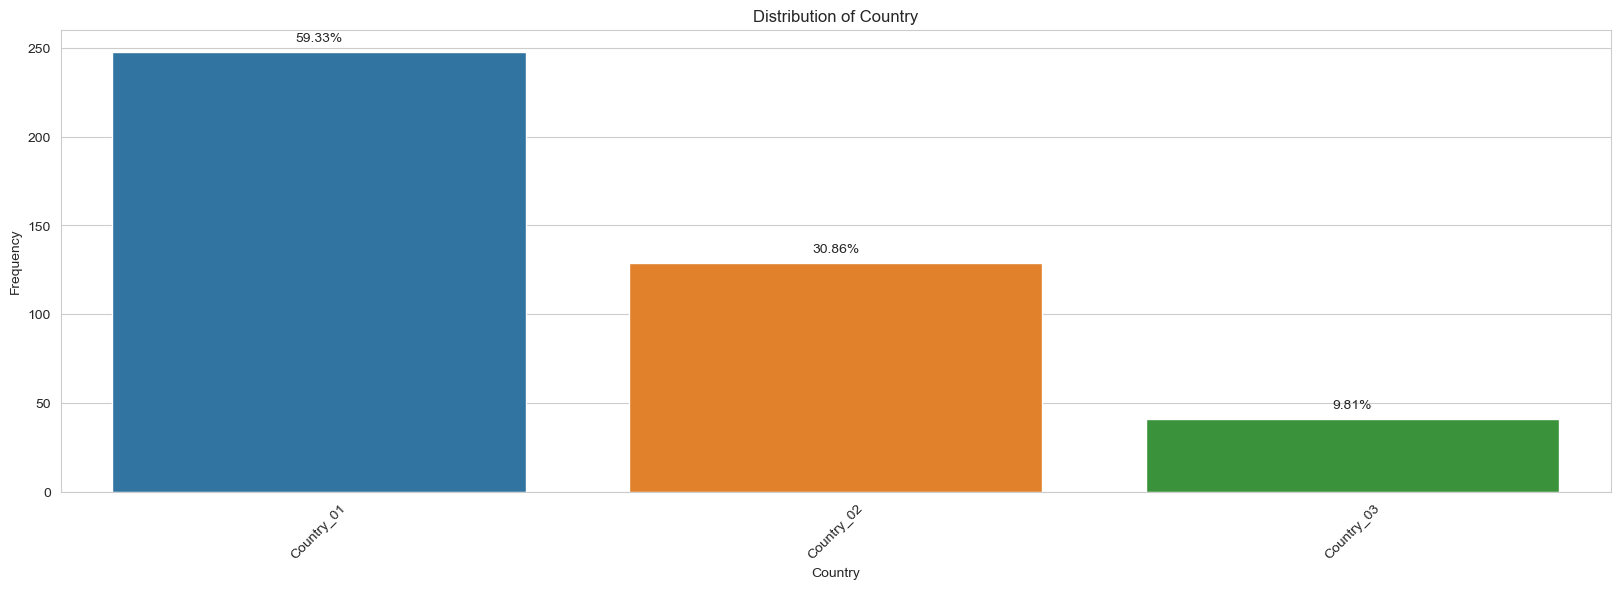

In [18]:
plot_countplot(df_proc_1, 'Country')

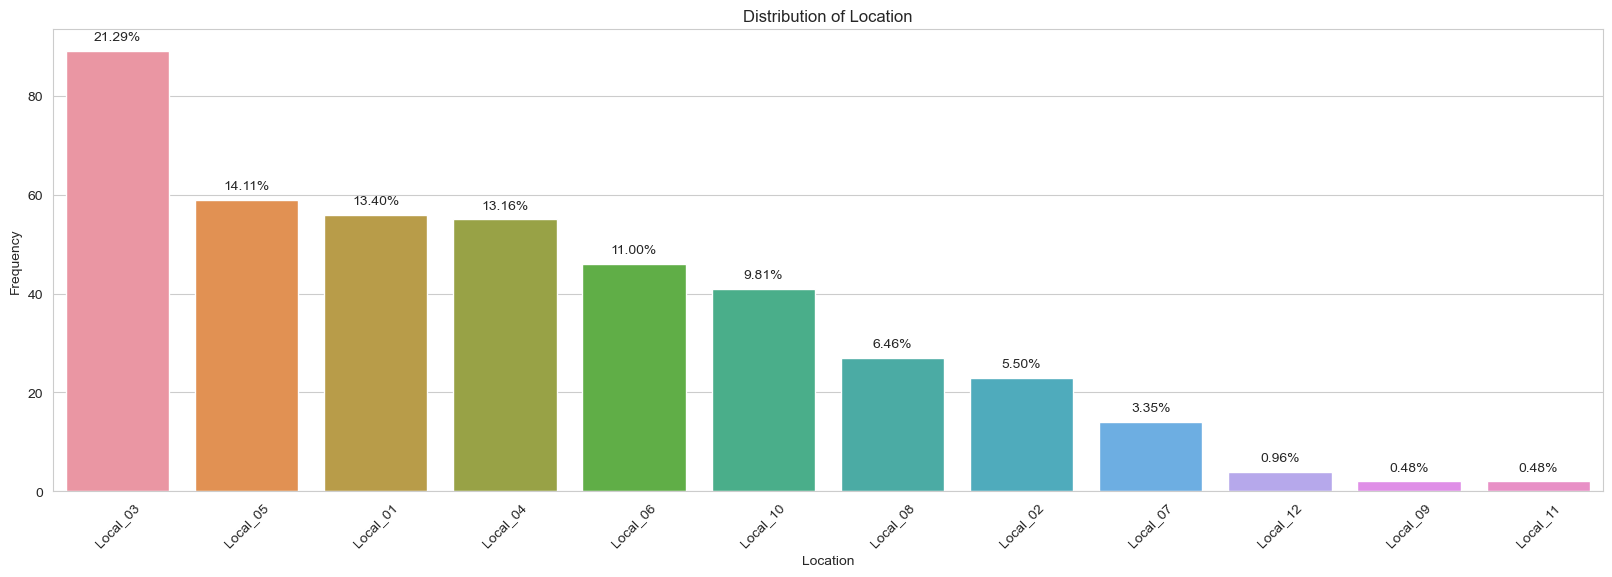

In [19]:
plot_countplot(df_proc_1, 'Location')

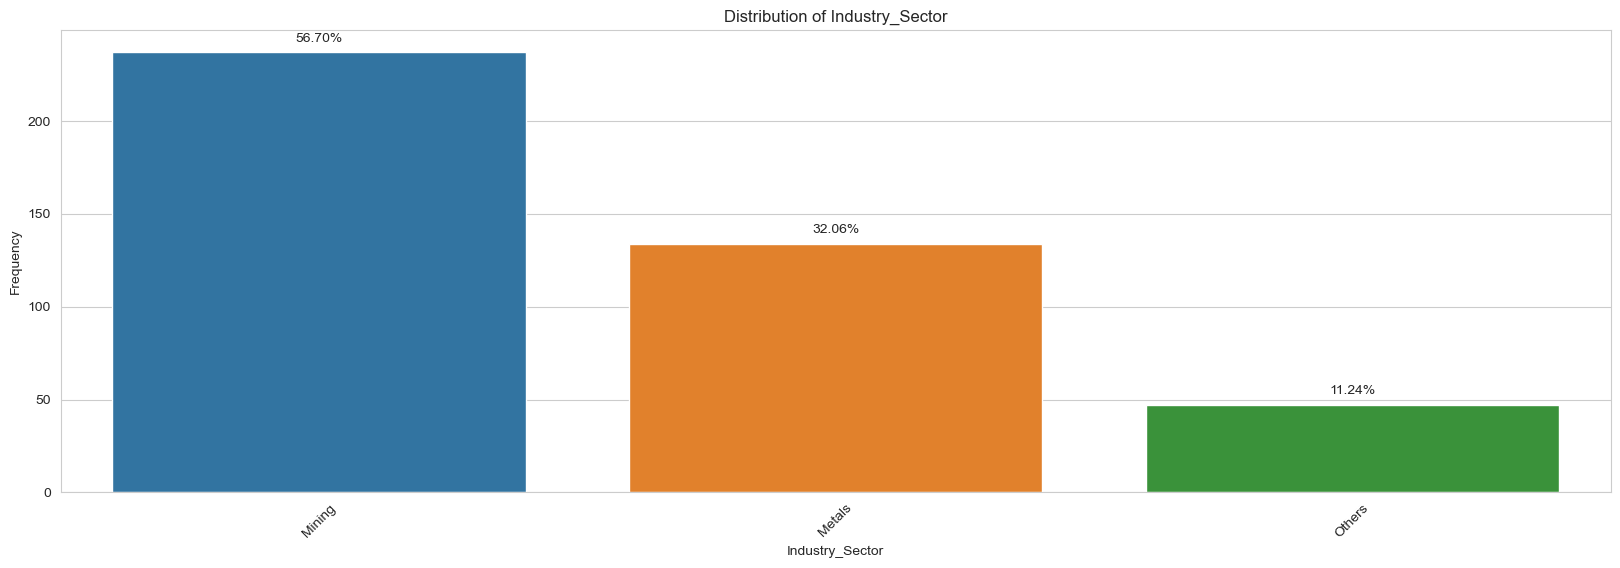

In [20]:
plot_countplot(df_proc_1, 'Industry_Sector')

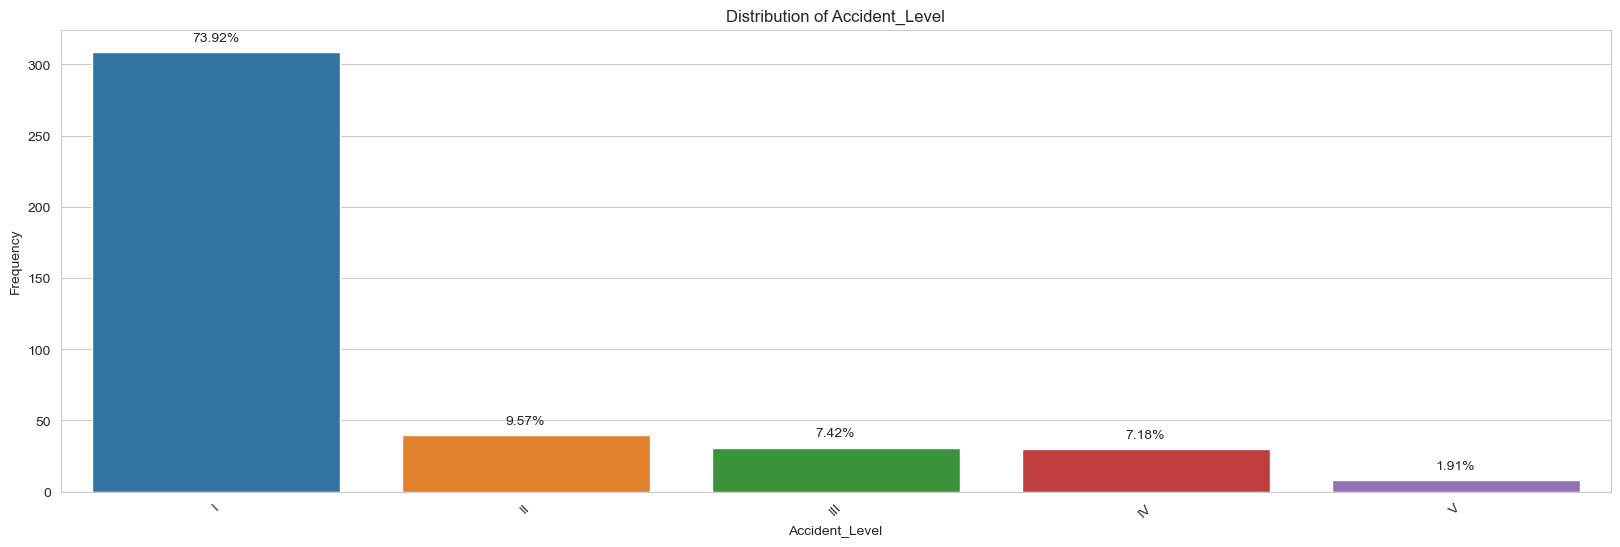

In [21]:
plot_countplot(df_proc_1, 'Accident_Level')

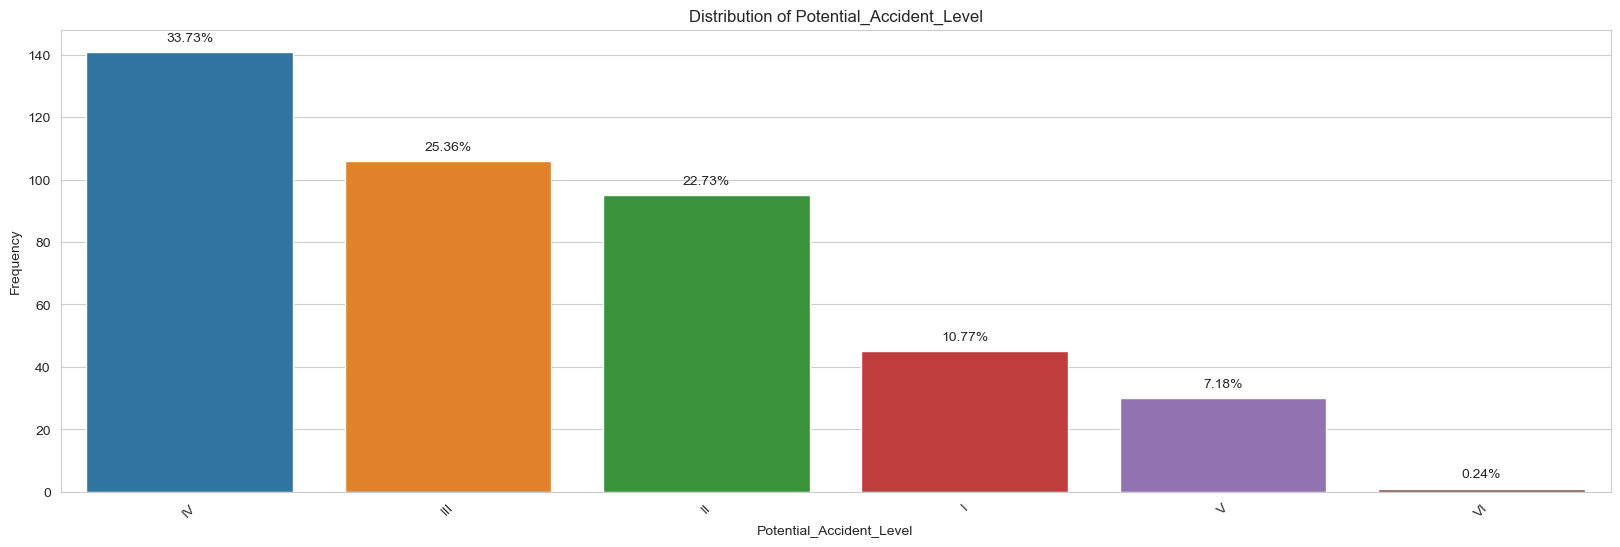

In [22]:
plot_countplot(df_proc_1, 'Potential_Accident_Level')

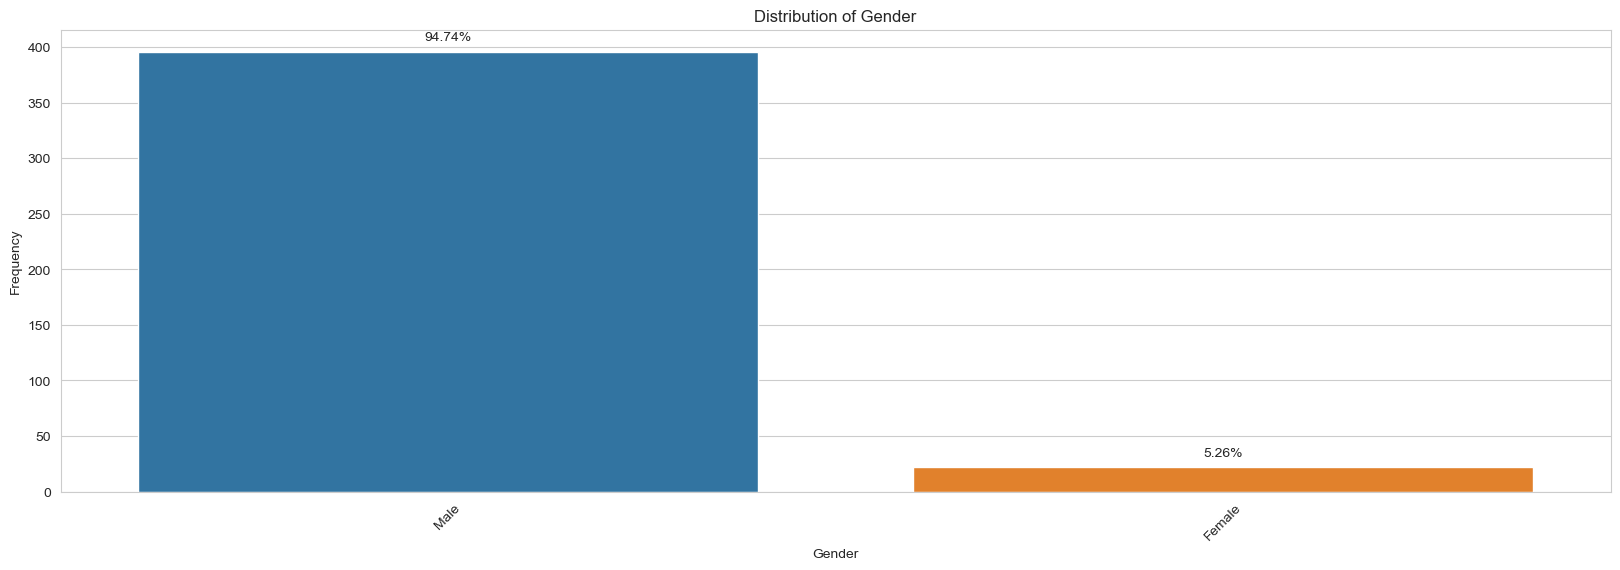

In [23]:
plot_countplot(df_proc_1, 'Gender')

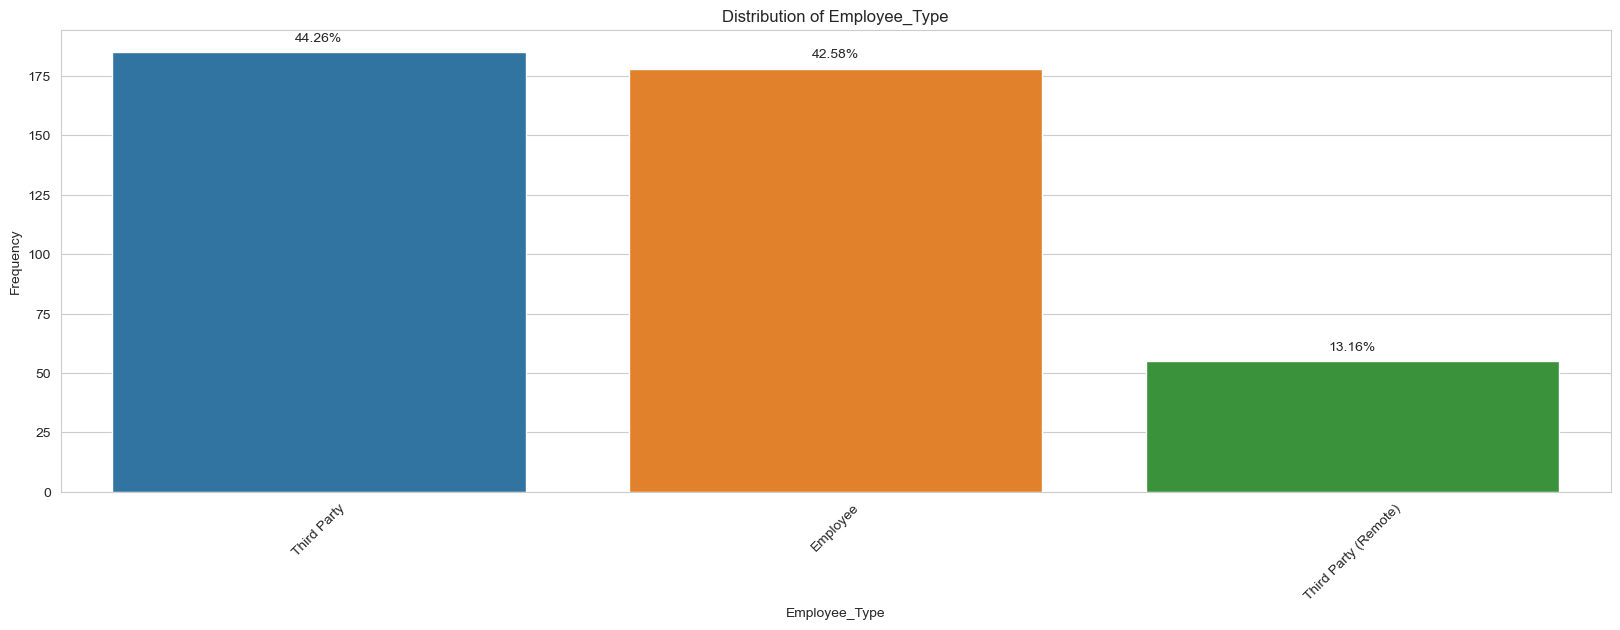

In [24]:
plot_countplot(df_proc_1, 'Employee_Type')

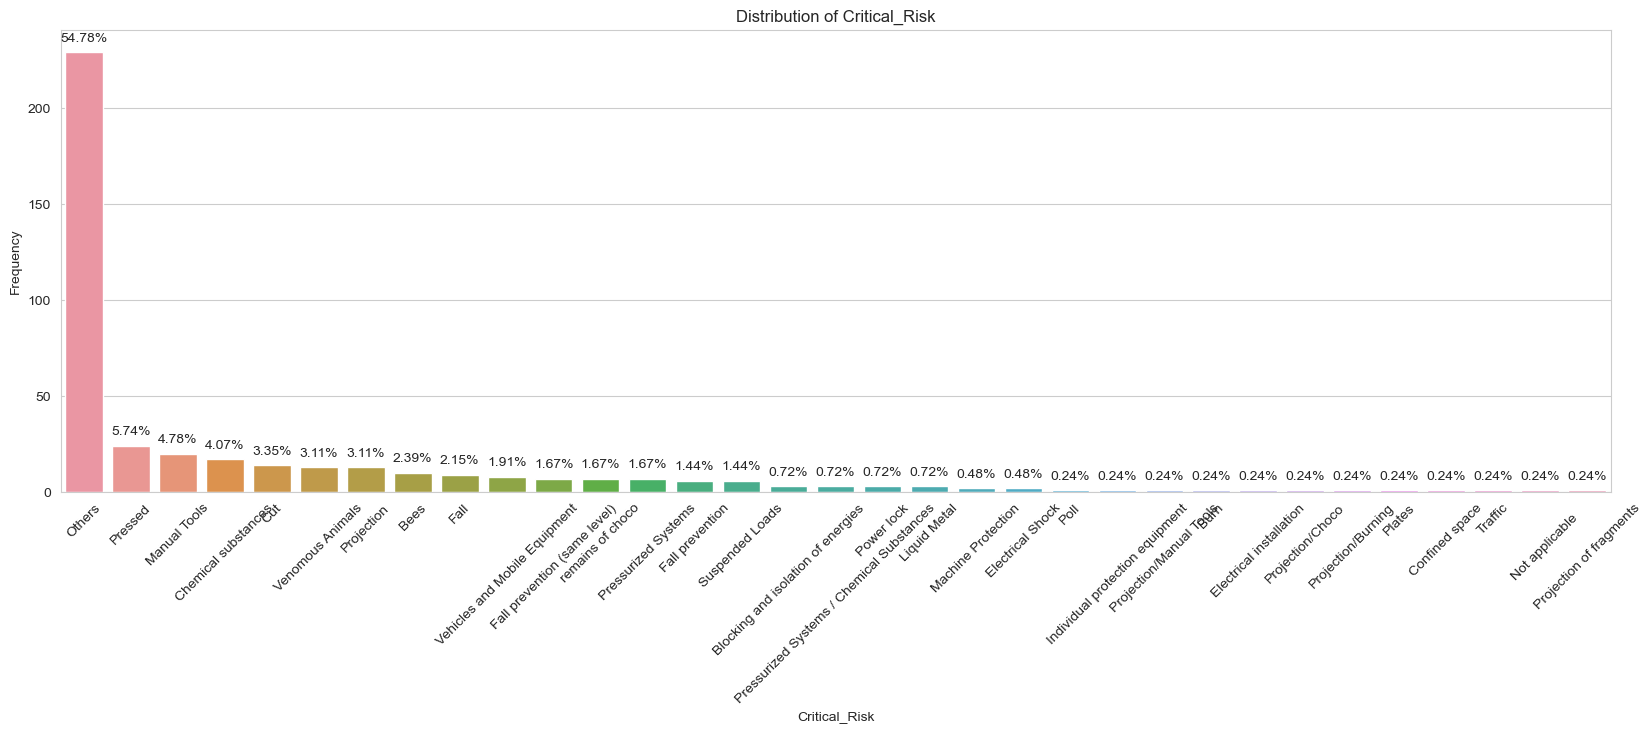

In [25]:
plot_countplot(df_proc_1, 'Critical_Risk')

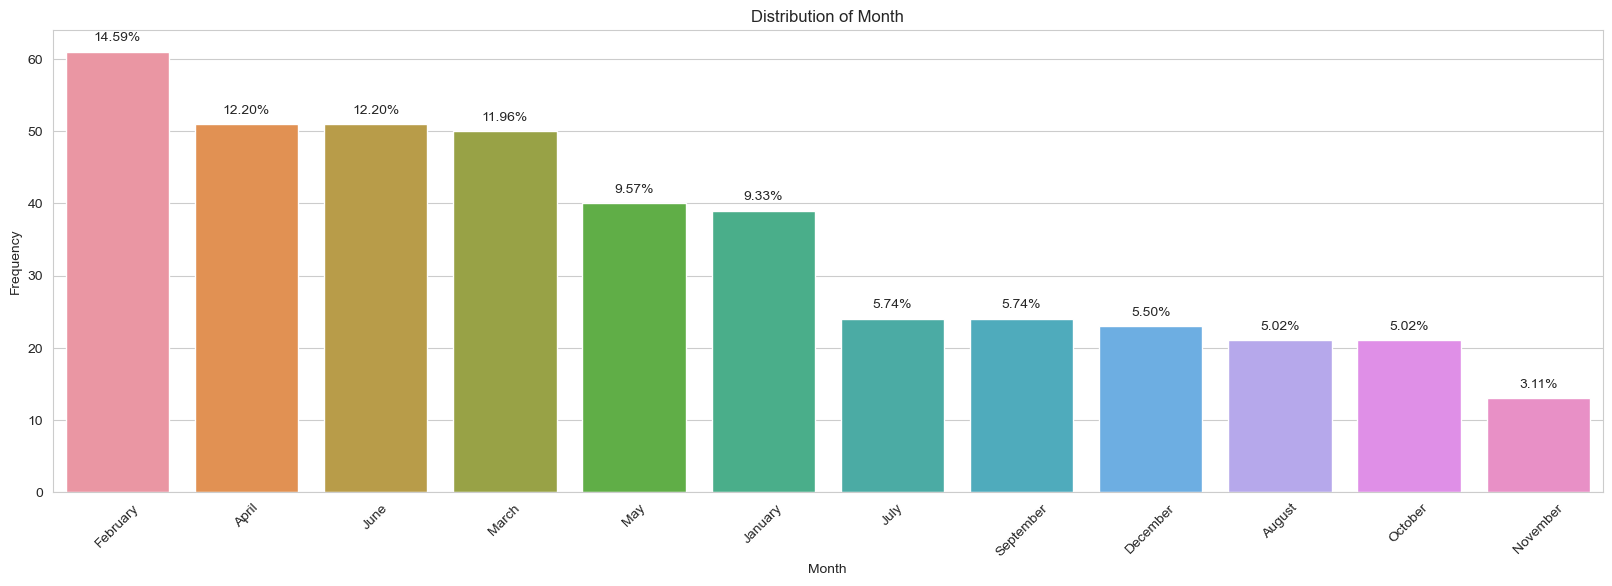

In [26]:
plot_countplot(df_proc_1, 'Month')

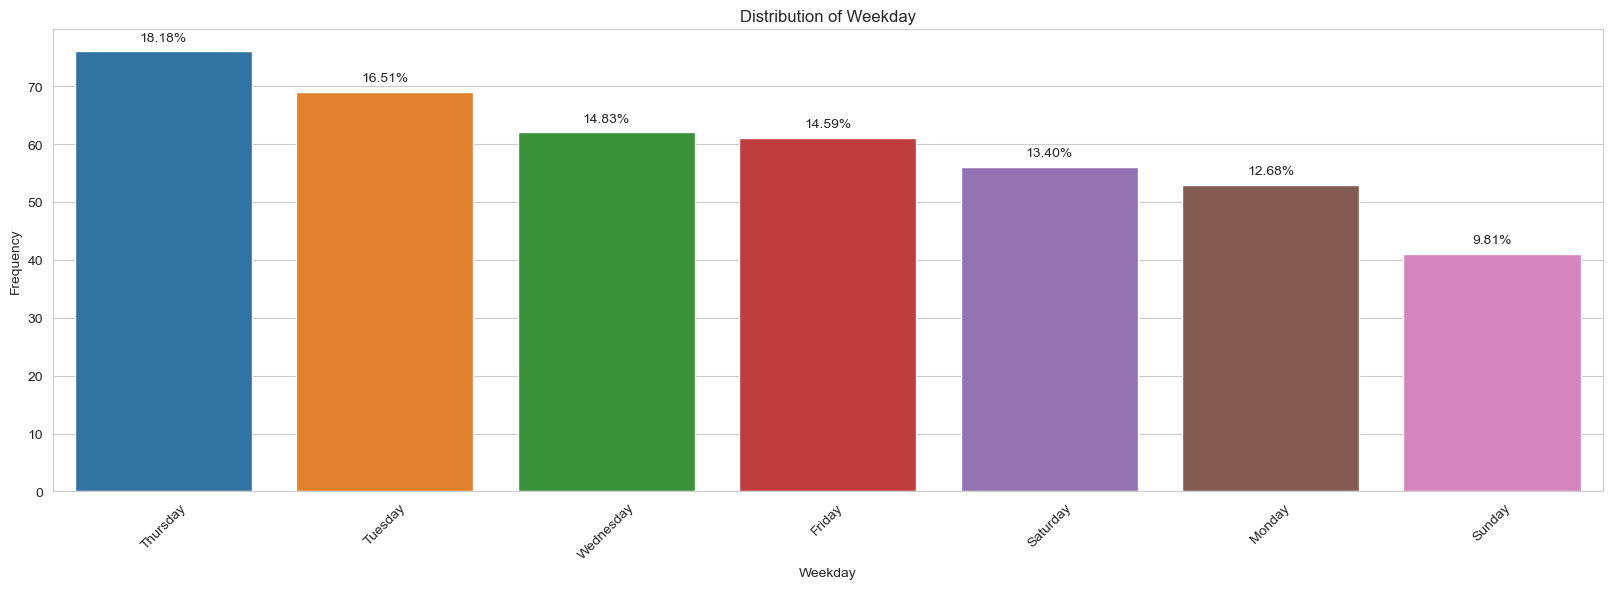

In [27]:
plot_countplot(df_proc_1, 'Weekday')

### **Bivariate Analysis**

#### **Distribution of features by Accident Level**

In [28]:
# Function to plot the distribution of accident levels by input column
def plot_accident_levels(df_temp, column, figsize=(20, 6), title_fontsize=15, label_fontsize=12, ticks_fontsize=10):
    plt.figure(figsize=figsize)
    sns.countplot(data=df_temp, x=column, hue='Accident_Level', order=df_temp[column].value_counts().index, dodge=False)
    plt.title(f'Distribution of Accident Levels by {column}', fontsize=title_fontsize)
    plt.xlabel(column, fontsize=label_fontsize)
    plt.xticks(rotation=90, fontsize=ticks_fontsize)
    plt.ylabel('Frequency', fontsize=label_fontsize)
    plt.legend(title='Accident Level', fontsize=ticks_fontsize, title_fontsize=label_fontsize)

    plt.show()

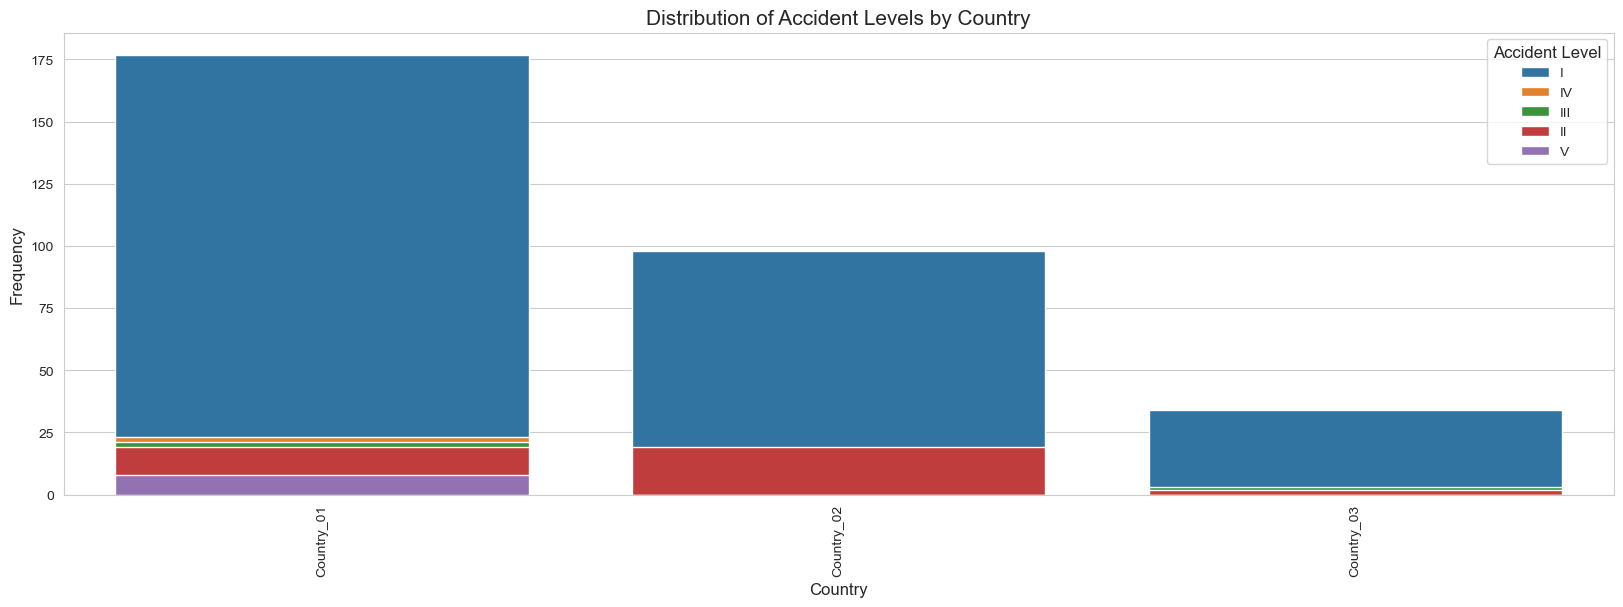

In [29]:
plot_accident_levels(df_proc_1, 'Country')

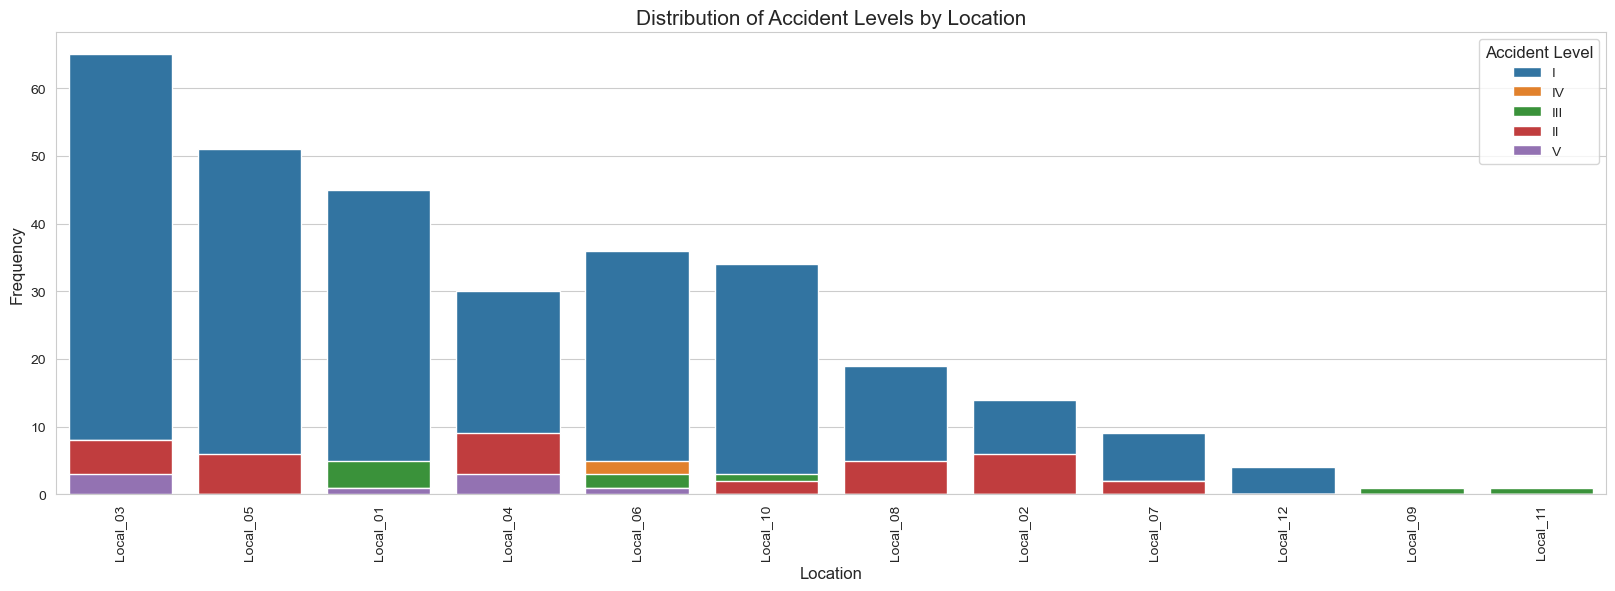

In [30]:
plot_accident_levels(df_proc_1, 'Location')

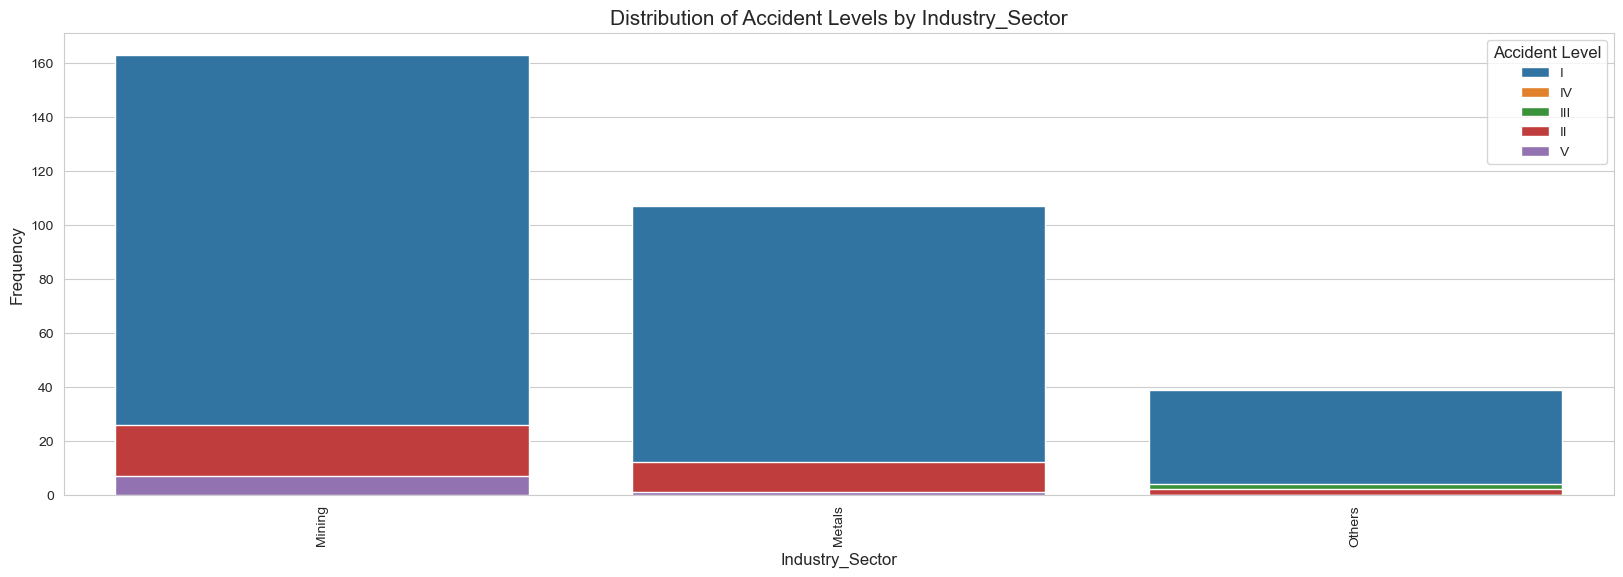

In [31]:
plot_accident_levels(df_proc_1, 'Industry_Sector')

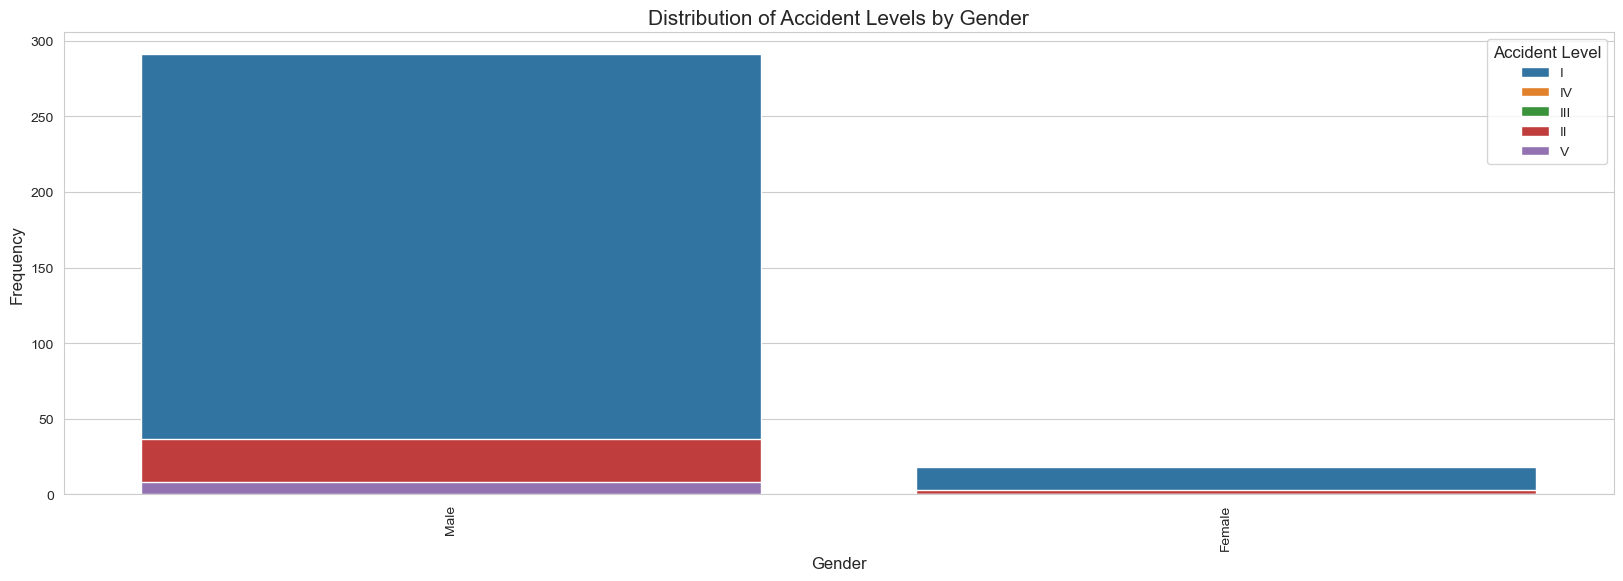

In [32]:
plot_accident_levels(df_proc_1, 'Gender')

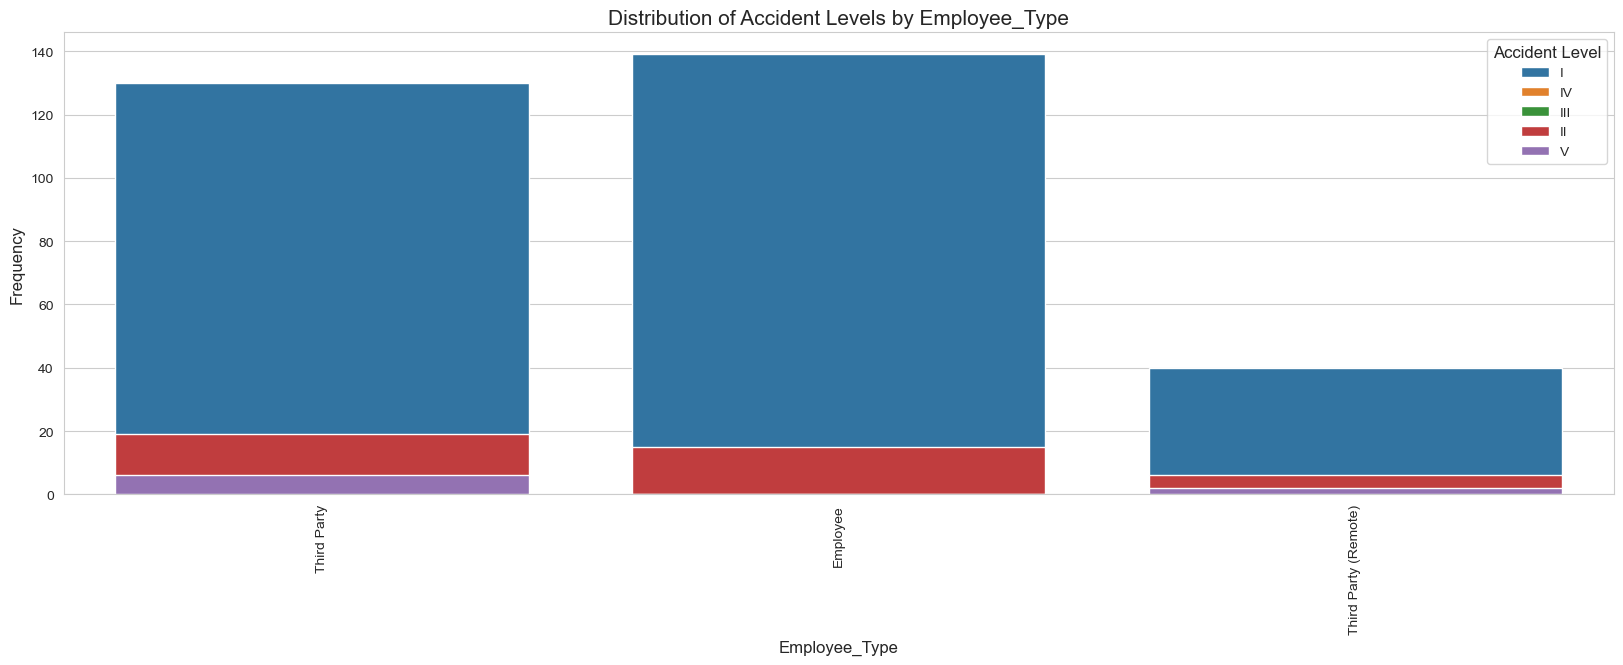

In [33]:
plot_accident_levels(df_proc_1, 'Employee_Type')

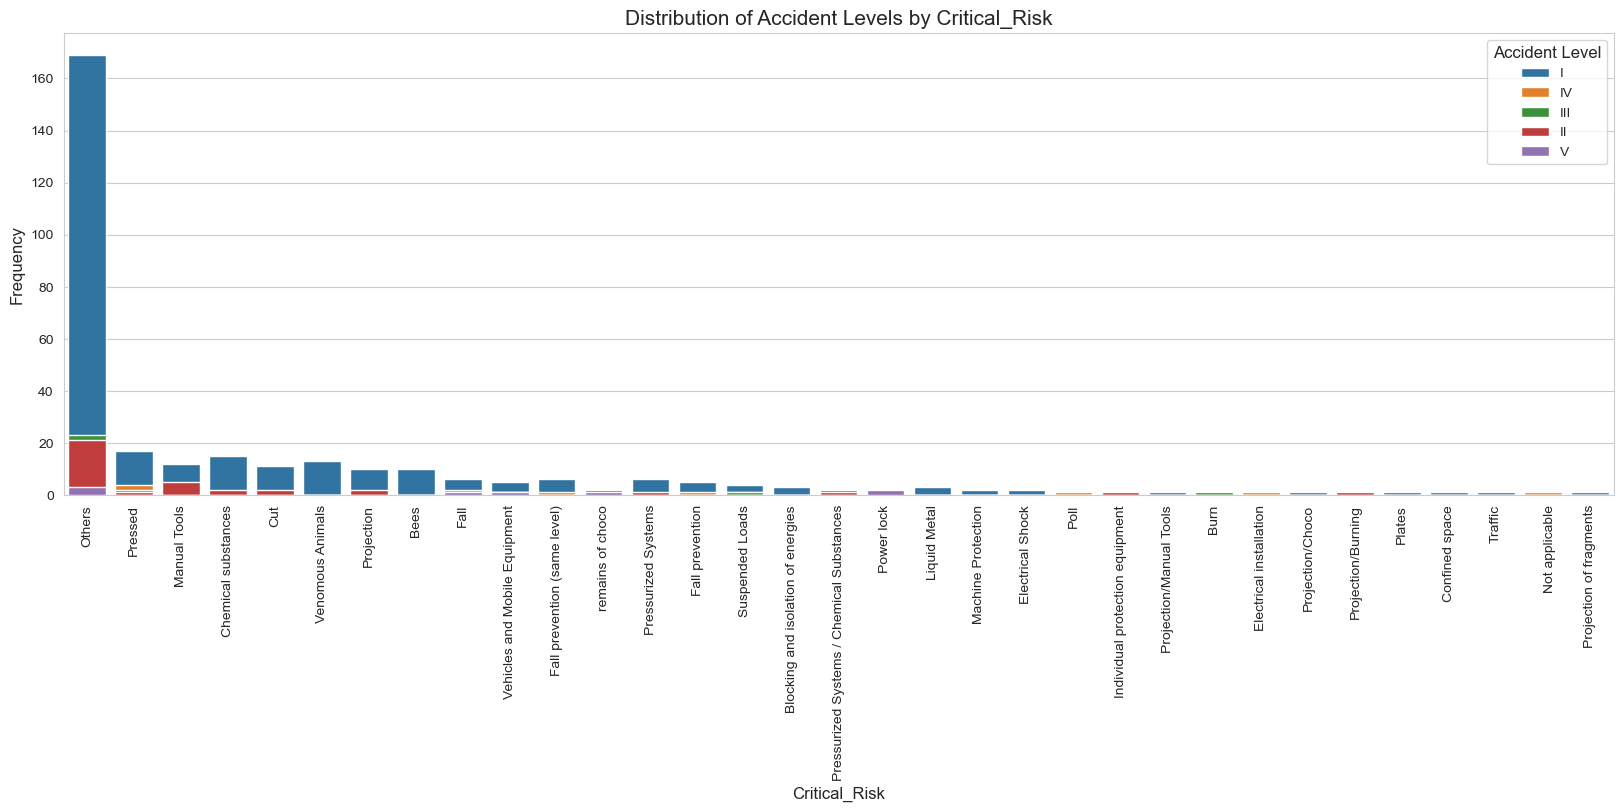

In [34]:
plot_accident_levels(df_proc_1, 'Critical_Risk')

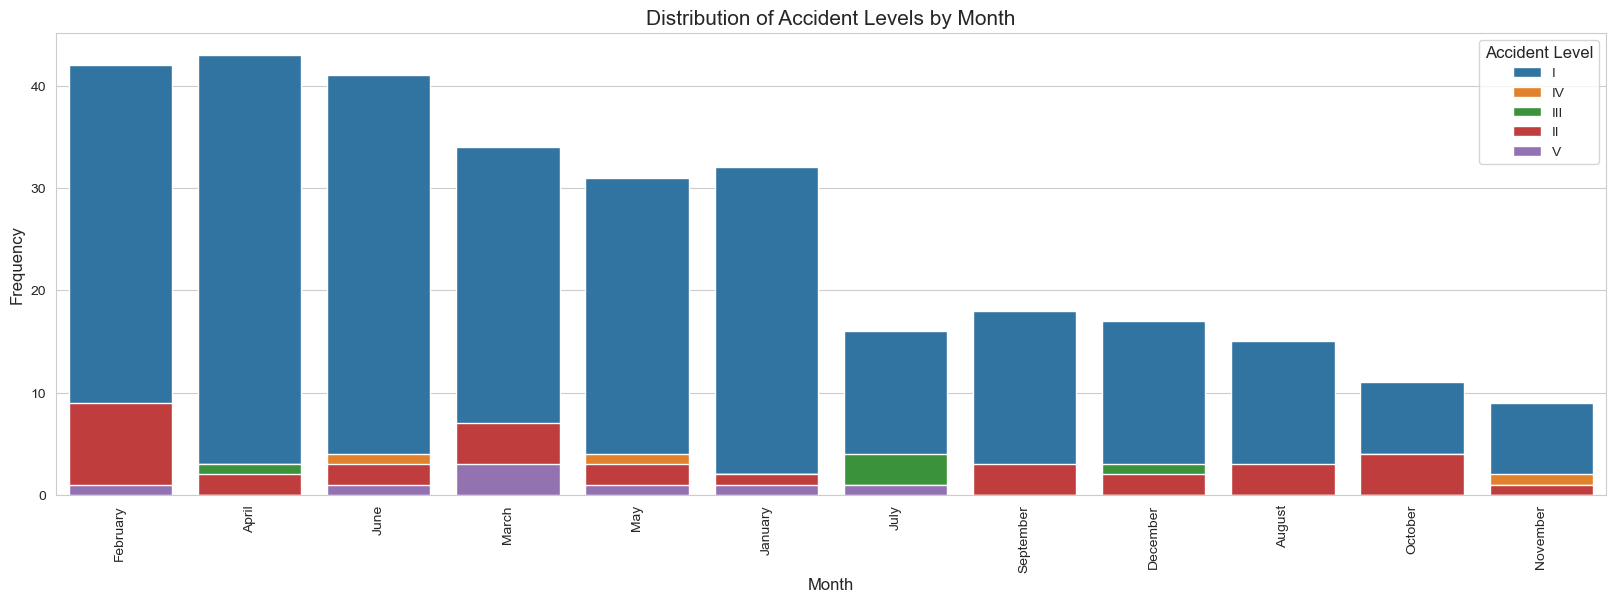

In [35]:
plot_accident_levels(df_proc_1, 'Month')

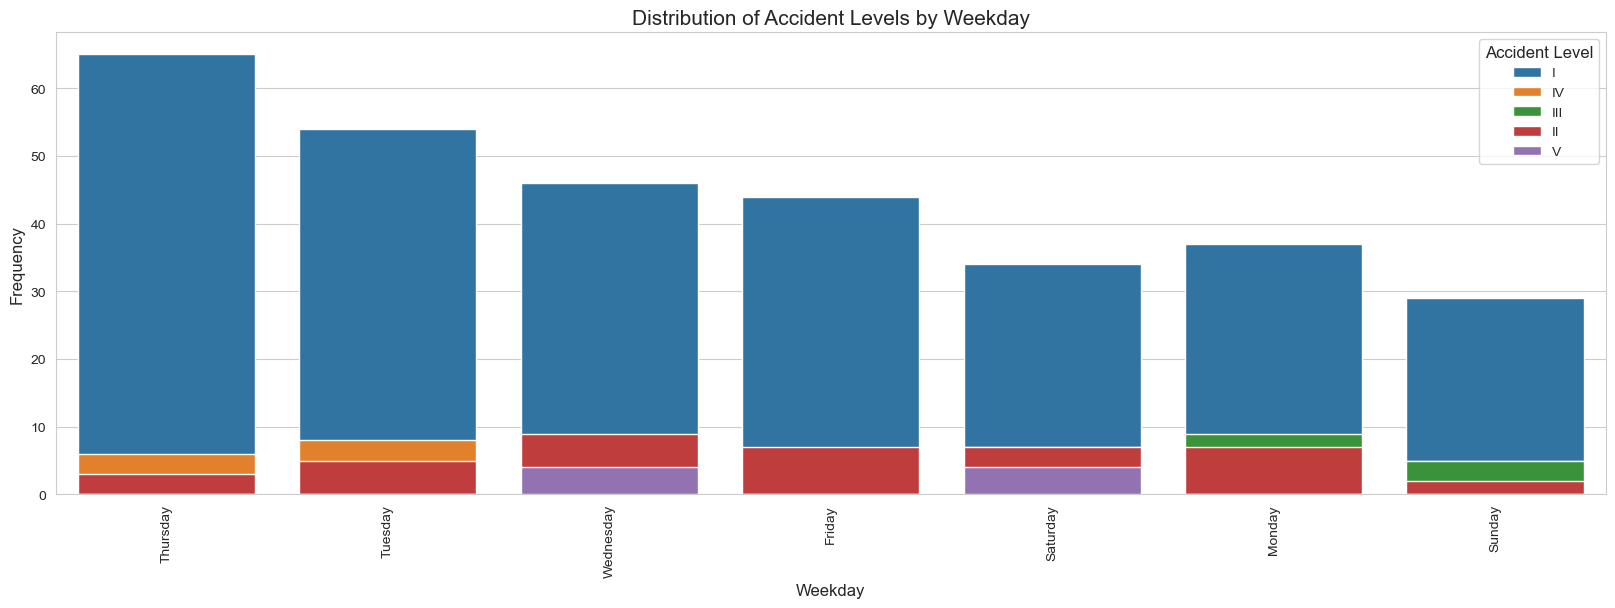

In [36]:
plot_accident_levels(df_proc_1, 'Weekday')

#### **Relationship between Accident Level and Potential Accident Level**

Convert the ordinal levels of `Accident Level` and `Potential Accident Level` from Roman to integers.

In [44]:
# Convert ordinal levels to numeric
df_proc_2 = df_proc_1.copy()

ordinal_mapping = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}

df_proc_2['Accident_Level'] = df_proc_2['Accident_Level'].map(ordinal_mapping)
df_proc_2['Potential_Accident_Level'] = df_proc_2['Potential_Accident_Level'].map(ordinal_mapping)

# Print the unique values of Accident_Level and Potential_Accident_Level
unique_values(df_proc_2.loc[:, ['Accident_Level', 'Potential_Accident_Level']])

Accident_Level: [1, 4, 3, 2, 5]
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]
-----------------------------------
Potential_Accident_Level: [4, 3, 1, 2, 5, 6]
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]
-----------------------------------


In [56]:
pd.crosstab(df_proc_2['Accident_Level'], df_proc_2['Potential_Accident_Level'])

Potential_Accident_Level,1,2,3,4,5,6
Accident_Level,,,,,,
1,45,88,89,78,9,0
2,0,7,14,16,3,0
3,0,0,3,26,2,0
4,0,0,0,21,9,0
5,0,0,0,0,7,1


In [58]:
print('Between Accident_Level and Potential_Accident_Level:')

# Calculate the Pearson correlation coefficient for Accident_Level and Potential_Accident_Level
person_correlation = df_proc_2['Accident_Level'].corr(df_proc_2['Potential_Accident_Level'])
print(f'The Pearson correlation coefficient is {person_correlation:.2f}')

# Calculate the Spearman correlation coefficient for Accident_Level and Potential_Accident_Level
spearman_correlation = df_proc_2['Accident_Level'].corr(df_proc_2['Potential_Accident_Level'], method='spearman')
print(f'The Spearman correlation coefficient is {spearman_correlation:.2f}')

Between Accident_Level and Potential_Accident_Level:
The Pearson correlation coefficient is 0.51
The Spearman correlation coefficient is 0.50


**Observation and Inference:**
- Both correlation coefficients (0.51 for Pearson and 0.50 for Spearman) suggest a **_moderate positive relationship_** between `Accident_Level` and `Potential_Accident_Level`. This indicates that higher levels of accidents are likely associated with higher potential levels of accidents.
- The similarity in values (0.51 for Pearson and 0.50 for Spearman) suggests that the relationship is reasonably **_consistent across both linear and monotonic assessments_**. This consistency strengthens the reliability of the observed association.

**Given the requirement for this project, we would drop the column `Accident_Level` and consider `Potential_Accident_Level` as the target variable.** 

In [59]:
# Drop the 'Accident_Level' column
df_proc_3 = df_proc_2.drop(columns=['Accident_Level'])
df_proc_3.head(3)

,Country,Location,Industry_Sector,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description,Month,Weekday
0,Country_01,Local_01,Mining,4,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",January,Friday
1,Country_02,Local_02,Mining,4,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",January,Saturday
2,Country_01,Local_03,Mining,3,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",January,Wednesday


## **NLP Data Preprocessing**

#### Cleaning the Description column

From visual analysis, following are the observations from the `Description` column:
- Presence of numbers.
- Presence of person and company names
- Duplicate descriptions corresponding to same Potential_Accident_Level but having other features different.
- Presence of special characters - degree sign, colon, hyphen, bracket, quotes, etc.
- Incorrect spellings of few words.
- All in English language.

In [75]:
# Function to convert the text to lowercase
def convert_to_lower(text):
    return text.lower()

In [78]:
df_proc_4 = df_proc_3.copy()
df_proc_4['Description'] = df_proc_4['Description'].apply(convert_to_lower)

df_proc_4['Description'].head(3)

0    while removing the drill rod of the jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.
1                                                                                                                                                          during the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. note: of sulphide solution = 48 grams / liter.
2                                                                         

We observe quite a few mentions of time in various formats. e.g. "9:45 am", "14:16", "04:50 p.m.", etc. Let us replace all these with period of the day - morning, afternoon, evening or night. 

In [80]:
import re

def get_time_period(time_str):
        # Convert 12-hour and 24-hour times to period
        try:
            # Handle 12-hour format with AM/PM
            if 'a.m.' in time_str.lower() or 'am' in time_str.lower():
                hour = int(re.findall(r'\d+', time_str)[0])
                if 5 <= hour < 12:
                    return 'morning'
                elif hour == 12:
                    return 'noon'
                else:
                    return 'early morning'
            
            # Handle 12-hour format with P.M.
            if 'p.m.' in time_str.lower() or 'pm' in time_str.lower():
                hour = int(re.findall(r'\d+', time_str)[0])
                if hour < 5:
                    return 'afternoon'
                elif 5 <= hour < 8:
                    return 'evening'
                else:
                    return 'night'
            
            # Handle 24-hour format
            hour = int(time_str.split(':')[0])
            if 5 <= hour < 12:
                return 'morning'
            elif 12 <= hour < 17:
                return 'afternoon'
            elif 17 <= hour < 20:
                return 'evening'
            else:
                return 'night'
        
        except (IndexError, ValueError):
            return time_str
        
# Function to convert numeric times to time periods (morning, afternoon, evening, night)
def convert_time_to_period(text):
    # Regex patterns for different time formats
    patterns = [
        r'\d{1,2}:\d{2}\s*(?:a\.m\.|am)',
        r'\d{1,2}:\d{2}\s*(?:p\.m\.|pm)',
        r'\d{1,2}:\d{2}'
    ]
    
    # Replace times with periods
    for pattern in patterns:
        text = re.sub(pattern, 
                      lambda m: get_time_period(m.group(0)), 
                      text, 
                      flags=re.IGNORECASE)
    
    return text

In [ ]:
df_proc_5 = df_proc_4.copy()
df_proc_5['Description'] = df_proc_5['Description'].apply(convert_time_to_period)

print(df_proc_5['Description'][71])

being approximately afternoon h when supervising the line clamping of the pom d071 roy canario returning to the thickener d1304 hits his nose with the metal chute out of operation.


The description contains names of person and places. Let us use a pretrained model from Hugging Face to extract and replace the named entities from the text.

In [ ]:
# Load the pre-trained NER model and tokenizer
import torch
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

# Check if GPU is available and set the device
device = 0 if torch.cuda.is_available() else -1

model_name = "dslim/distilbert-NER"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

In [92]:
# Function to detect and replace names
def detect_replace_names(text):
    # Load the NER pipeline
    ner = pipeline('ner', model=model, tokenizer=tokenizer, device=device)

    # Detect names in the text
    entities = ner(text)

    # Replace names with string 'NAME'
    for entity in entities:
        if entity['entity'] == 'I-PER' or entity['entity'] == 'B-PER':
            text = text.replace(entity['word'], '[NAME]')
        elif entity['entity'] == 'I-ORG' or entity['entity'] == 'B-ORG':
            text = text.replace(entity['word'], '[ORGANIZATION]')
        elif entity['entity'] == 'I-LOC' or entity['entity'] == 'B-LOC':
            text = text.replace(entity['word'], '[LOCATION]')
        elif entity['entity'] == 'I-MISC' or entity['entity'] == 'B-MISC':
            text = text.replace(entity['word'], '[MISC]')

    return text

In [93]:
df_proc_6 = df_proc_5.copy()
df_proc_6['Description'] = df_proc_6['Description'].apply(detect_replace_names)

print(df_proc_5['Description'][3])

being morning. approximately in the nv. 1880 cx-695 ob7, the personnel begins the task of unlocking the soquet bolts of the bhb machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding mr. cristóbal - auxiliary assistant to climb to the platform to exert pressure with your hand on the "dado" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.


In [ ]:
# Combined text processing pipeline function
def text_processing_pipeline(text):
    text = detect_replace_names(text)
    text = convert_to_lower(text)
    text = convert_time_to_period(text)    
    return text

In [ ]:
df_proc_4 = df_proc_3.copy()
df_proc_4['Description'] = df_proc_4['Description'].apply(text_processing_pipeline)

df_proc_4['Description'].head(3)

#### One-hot encoding for the categorical columns

Let us perform one-hot encoding for the following categorical columns: 
- `Country`: Different countries represented
- `Location`: Different city/plant locations
- `Industry_sector`: Various industrial sectors
- `Gender`: Male/Female categories
- `Employee_Type`: Employee or external worker
- `Critical_Risk`: Different risk categories

The other columns do not require one-hot encoding, since they are `Date` or `Description` or `Accident levels` which are ordinal in nature.

In [37]:
columns_to_encode = ['Country', 'Location', 'Industry_Sector', 'Gender', 'Employee_Type', 'Critical_Risk']

# One hot encode the columns
one_hot = pd.get_dummies(df_proc_1[columns_to_encode], prefix=columns_to_encode, dtype=int)
one_hot.head(3)

,Country_Country_01,Country_Country_02,Country_Country_03,Location_Local_01,Location_Local_02,Location_Local_03,Location_Local_04,Location_Local_05,Location_Local_06,Location_Local_07,...,Critical_Risk_Projection,Critical_Risk_Projection of fragments,Critical_Risk_Projection/Burning,Critical_Risk_Projection/Choco,Critical_Risk_Projection/Manual Tools,Critical_Risk_Suspended Loads,Critical_Risk_Traffic,Critical_Risk_Vehicles and Mobile Equipment,Critical_Risk_Venomous Animals,Critical_Risk_remains of choco
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
